In [2]:

# Install tensorflow using the following command
# !pip install tensorflow==2.5.0

In [1]:
#Importing
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import tensorflow as tf
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import signal
from scipy import misc
from PIL import Image
plt.rcParams['figure.figsize'] = (10, 6)

ModuleNotFoundError: No module named 'tensorflow'

In [5]:
if not tf.__version__ == '2.5.0':
    print(tf.__version__)
    raise ValueError('please upgrade to TensorFlow 2.5.0, or restart your Kernel (Kernel->Restart & Clear Output)')

In [5]:
X = np.arange(0.0, 5.0, 0.1)
X

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])

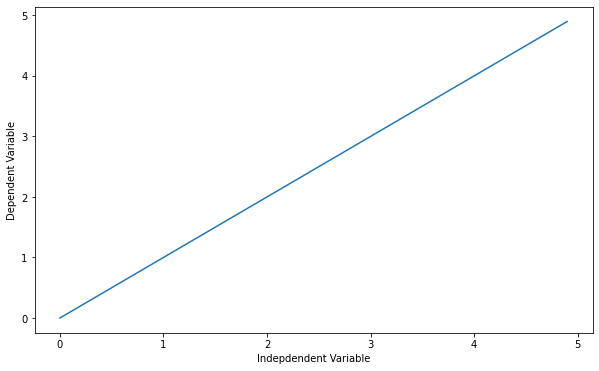

In [6]:
##You can adjust the slope and intercept to verify the changes in the graph
a = 1
b = 0

Y= a * X + b 

plt.plot(X, Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

In [8]:

df = pd.read_csv("FuelConsumptionCo2.csv")
df
# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [8]:
import numpy as np

h = [2, 1, 0]
x = [3, 4, 5]
 

y = np.convolve(x, h)
y

array([ 6, 11, 14,  5,  0])

In [9]:
x = [6, 2]
h = [1, 2, 5, 4]

#now, because of the zero padding, the final dimension of the array is bigger

y = np.convolve(x, h, "full") 
y 

array([ 6, 14, 34, 34,  8])

In [10]:
# using the same padding
x = [6, 2]
h = [1, 2, 5, 4]
# it is same as zero padding, but with returns an ouput with the same length as max of x or h

y = np.convolve(x, h, "same")  
y  

array([ 6, 14, 34, 34])

In [11]:
# Visually understanding the operation with no padding (valid)
x = [6, 2]
h = [1, 2, 5, 4]

 # valid returns output of length max(x, h) - min(x, h) + 1, this is to ensure that values outside of the boundary
# of h will not be used in the calculation of the convolution in the next example we will understand why we used 
# the argument valid

y = np.convolve(x, h, "valid")  
y  

array([14, 34, 34])

In [12]:
from scipy import signal as sg

I= [[255,   7,  3],
    [212, 240,  4],
    [218, 216, 230],]

g= [[-1, 1]]

print('Without zero padding \n')
print('{0} \n'.format(sg.convolve( I, g, 'valid')))
# The 'valid' argument states that the output consists only of those elements 
# that do not rely on the zero-padding.

print('With zero padding \n')
print(sg.convolve( I, g))

Without zero padding 

[[248   4]
 [-28 236]
 [  2 -14]] 

With zero padding 

[[-255  248    4    3]
 [-212  -28  236    4]
 [-218    2  -14  230]]


In [13]:
I= [[255,   7,  3],
    [212, 240,  4],
    [218, 216, 230],]

g= [[-1,  1],
    [ 2,  3],]

print ('With zero padding \n')
print ('{0} \n'.format(sg.convolve( I, g, 'full')))
# The output is the full discrete linear convolution of the inputs. 
# It will use zero to complete the input matrix

print ('With zero padding_same_ \n')
print ('{0} \n'.format(sg.convolve( I, g, 'same')))
# The output is the full discrete linear convolution of the inputs. 
# It will use zero to complete the input matrix


print ('Without zero padding \n')
print (sg.convolve( I, g, 'valid'))
# The 'valid' argument states that the output consists only of those elements 
#that do not rely on the zero-padding.

With zero padding 

[[-255  248    4    3]
 [ 298  751  263   13]
 [ 206 1118  714  242]
 [ 436 1086 1108  690]] 

With zero padding_same_ 

[[-255  248    4]
 [ 298  751  263]
 [ 206 1118  714]] 

Without zero padding 

[[ 751  263]
 [1118  714]]


In [14]:
from IPython.display import Markdown, display

def printmd(string):
    display(Markdown('# <span style="color:red">'+string+'</span>'))



In [34]:
input = tf.Variable(tf.random.normal([1, 10, 10, 1]))
filter = tf.Variable(tf.random.normal([3, 3, 1, 1]))
op = tf.nn.conv2d(input, filter, strides=[1, 1, 1, 1], padding='VALID')
op2 = tf.nn.conv2d(input, filter, strides=[1, 1, 1, 1], padding='SAME')

print("Input \n")
print('{0} \n'.format(input.numpy()))
print("Filter/Kernel \n")
print('{0} \n'.format(filter.numpy()))
print("Result/Feature Map with valid positions \n")
print(op.numpy())
print('\n')
print("Result/Feature Map with padding \n")
print(op2.numpy())

Input 

[[[[ 0.7717189 ]
   [ 0.9601908 ]
   [ 1.6261756 ]
   [-0.06863161]
   [-0.96358645]
   [ 1.4380602 ]
   [-0.71455634]
   [ 1.3956552 ]
   [-1.8544917 ]
   [-0.682935  ]]

  [[-1.4164261 ]
   [-1.8859973 ]
   [ 0.544176  ]
   [ 0.20822886]
   [-0.05530399]
   [ 1.2058985 ]
   [-1.360652  ]
   [-0.00540849]
   [ 0.8242099 ]
   [ 0.04984643]]

  [[ 0.21550085]
   [ 0.5036617 ]
   [-0.9580423 ]
   [ 0.8421059 ]
   [ 1.27279   ]
   [ 2.3864913 ]
   [-0.6012788 ]
   [-2.9029157 ]
   [-0.8835889 ]
   [-0.30047265]]

  [[-0.9080486 ]
   [-0.24193768]
   [-0.36253813]
   [-0.5694445 ]
   [-0.06240551]
   [-0.12707071]
   [-0.06778177]
   [ 1.159185  ]
   [-0.60931796]
   [ 0.15500365]]

  [[ 1.5871564 ]
   [ 1.1886559 ]
   [ 0.5011676 ]
   [ 0.22310245]
   [-0.47039202]
   [-0.20446323]
   [ 0.8345525 ]
   [-0.43931082]
   [ 0.3437105 ]
   [-0.56365407]]

  [[-0.01257341]
   [-0.4018089 ]
   [-0.27979007]
   [-2.4605174 ]
   [-2.1118774 ]
   [ 0.08493569]
   [ 0.31786773]
   [ 1.070605


 Original type: <PIL.Image.Image image mode=L size=1456x2592 at 0x7EFC3DC32220> 


After conversion to numerical representation: 

 array([[242, 242, 242, ..., 225, 225, 225],
       [241, 241, 241, ..., 226, 226, 226],
       [241, 241, 241, ..., 226, 226, 226],
       ...,
       [112, 113, 112, ...,  12,  10,  11],
       [111, 113, 114, ...,  13,  10,  11],
       [111, 110, 112, ...,  10,  10,  15]], dtype=uint8)

 Input image converted to gray scale: 



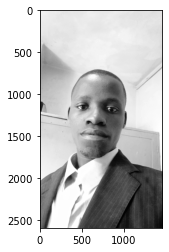

In [16]:
im = Image.open('ml2.jpg')  # type here your image's name

image_gr = im.convert("L")
# convert("L") translate color images into black and white
# uses the ITU-R 601-2 Luma transform (there are several 
# ways to convert an image to grey scale)
print("\n Original type: %r \n\n" % image_gr)

# convert image to a matrix with values from 0 to 255 (uint8) 
arr = np.asarray(image_gr) 
print("After conversion to numerical representation: \n\n %r" % arr) 
### Activating matplotlib for Ipython
%matplotlib inline
### Plot image
imgplot = plt.imshow(arr)
imgplot.set_cmap('gray')  #you can experiment different colormaps (Greys,winter,autumn)
print("\n Input image converted to gray scale: \n")
plt.show(imgplot)

GRADIENT MAGNITUDE - Feature map


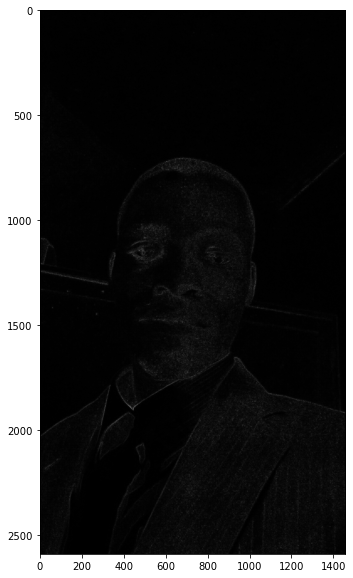

In [17]:
# Now, we will experiment using an edge detector kernel.
kernel = np.array([[ 0, 1, 0],
                   [ 1,-4, 1],
                   [ 0, 1, 0],]) 

grad = signal.convolve2d(arr, kernel, mode='same', boundary='symm')

%matplotlib inline

print('GRADIENT MAGNITUDE - Feature map')

fig, aux = plt.subplots(figsize=(10, 10))
aux.imshow(np.absolute(grad), cmap='gray')

In [18]:
type(grad)

grad_biases = np.absolute(grad) + 100

grad_biases[grad_biases > 255] = 255

GRADIENT MAGNITUDE - Feature map


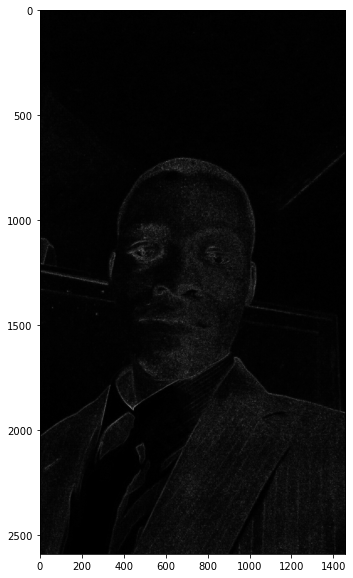

In [19]:
%matplotlib inline

print('GRADIENT MAGNITUDE - Feature map')

fig, aux = plt.subplots(figsize=(10, 10))
aux.imshow(np.absolute(grad_biases), cmap='gray')

In [20]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [22]:
x_train, x_test = x_train / 255.0, x_test / 255.0
print(y_train[0:5])

[5 0 4 1 9]


In [38]:
print("categorical labels")
print(y_train[0:5])

# make labels one hot encoded
y_train = tf.one_hot(y_train, 10)
y_test = tf.one_hot(y_test, 10)

print("one hot encoded labels")
print(y_train[0:5])

categorical labels
tf.Tensor(
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]], shape=(5, 10), dtype=float32)


InvalidArgumentError: Value for attr 'TI' of float is not in the list of allowed values: uint8, int32, int64
	; NodeDef: {{node OneHot}}; Op<name=OneHot; signature=indices:TI, depth:int32, on_value:T, off_value:T -> output:T; attr=axis:int,default=-1; attr=T:type; attr=TI:type,default=DT_INT64,allowed=[DT_UINT8, DT_INT32, DT_INT64]> [Op:OneHot]

In [26]:
print("number of training examples:" , x_train.shape[0])
print("number of test examples:" , x_test.shape[0])

number of training examples: 60000
number of test examples: 10000
